In [1]:
import math
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import numpy as np
import os
import pathlib
import tensorflow as tf 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

## Check dataset

In [2]:
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = './images/images/'

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


## Show some pics

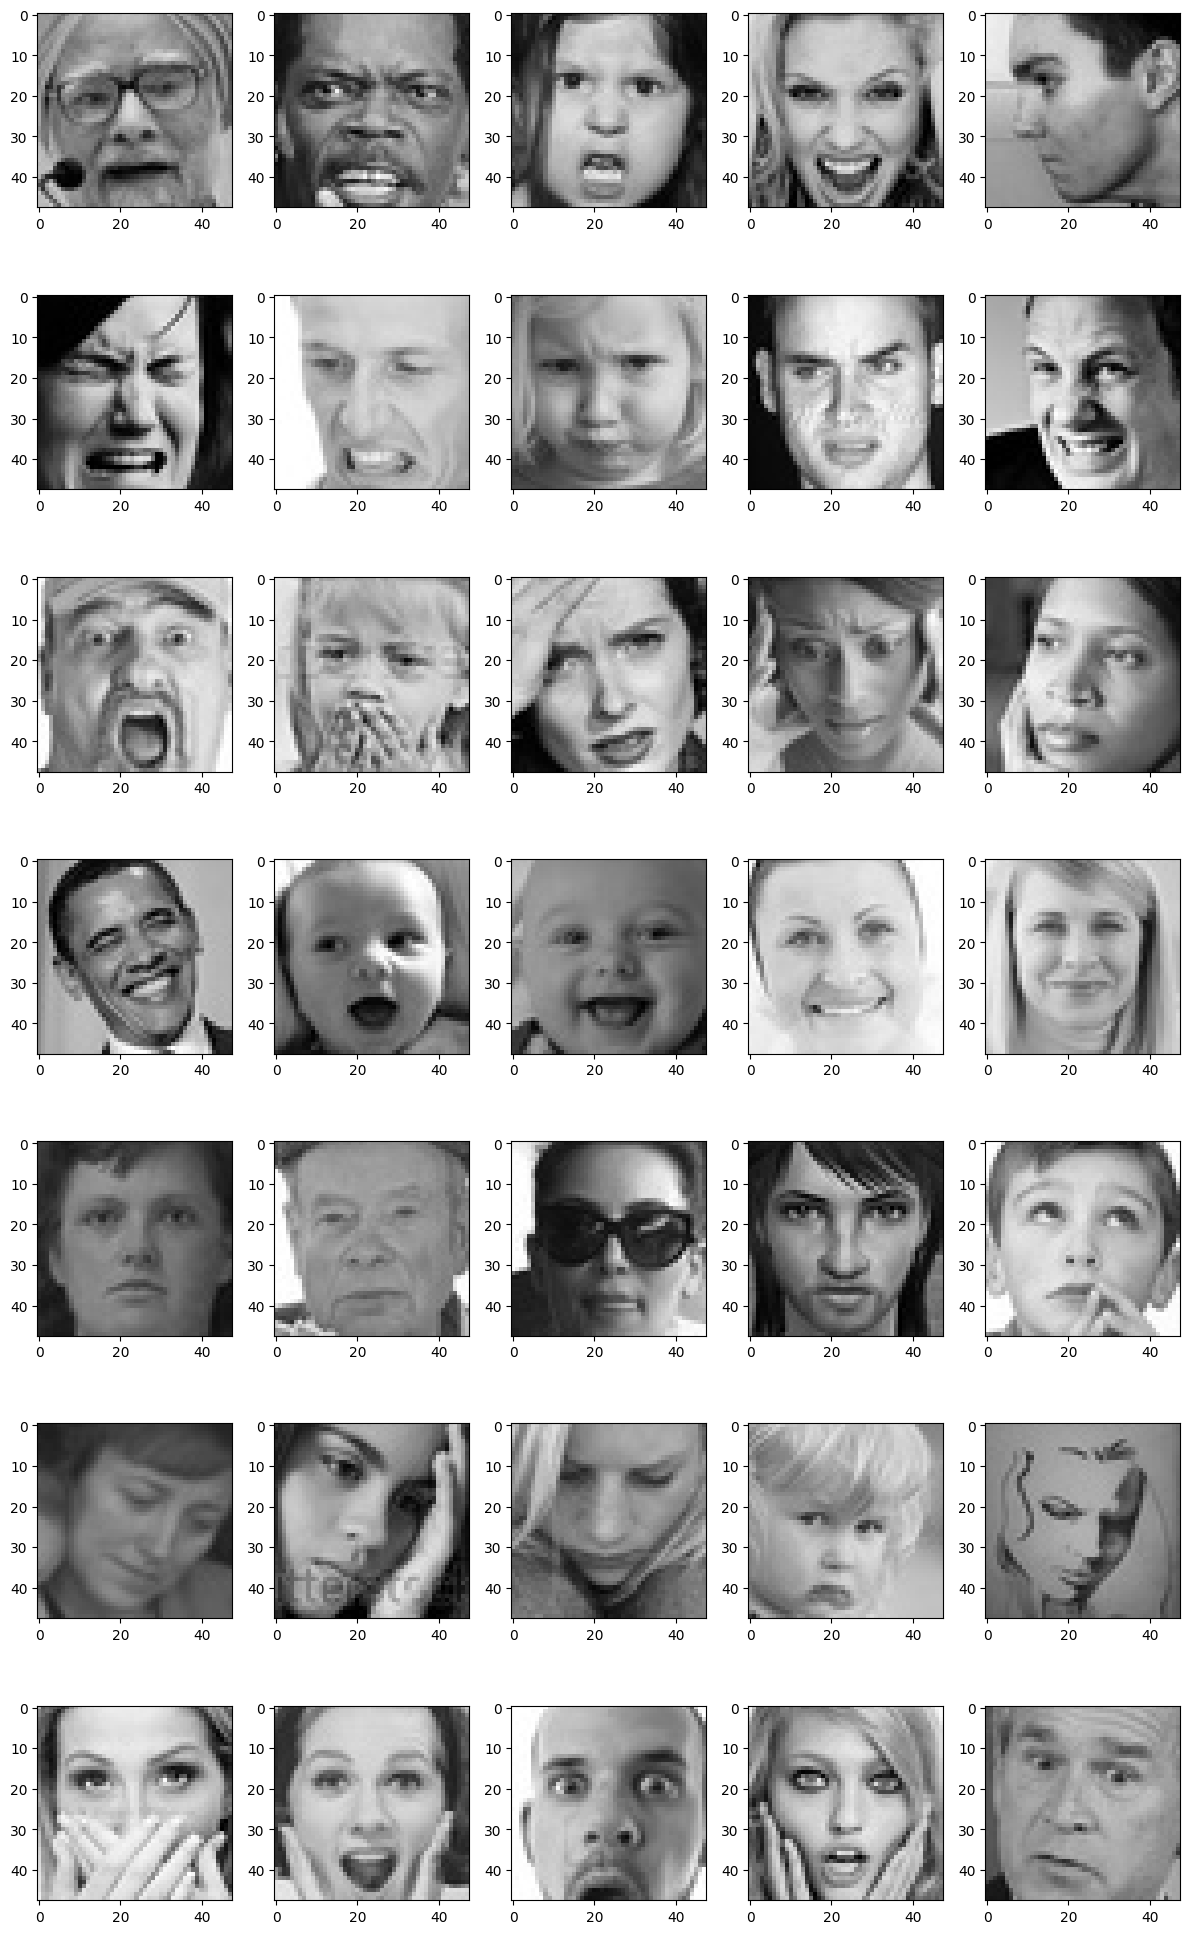

In [3]:
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

## Test Model 1
### Dropout rate = 0.3
### Change hyperparameters

In [4]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Fully connected layer 2nd layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Data generator

In [5]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Train model 1

In [6]:
train_path = './images/train/'
validation_path = './images/validation/'

train_dataset = image_dataset_from_directory(
                train_path, image_size=(48,48), 
                batch_size=batch_size,
                label_mode='categorical')
validation_dataset = image_dataset_from_directory(
                    validation_path, 
                    image_size=(48,48), 
                    batch_size=batch_size, 
                    label_mode='categorical')

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [8]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50


226/226 [==============================] - 37s 145ms/step - loss: 2.0569 - accuracy: 0.2218 - val_loss: 1.7647 - val_accuracy: 0.2935
Epoch 2/50
226/226 [==============================] - 11s 50ms/step - loss: 1.9184 - accuracy: 0.2617 - val_loss: 1.7656 - val_accuracy: 0.3027
Epoch 3/50
226/226 [==============================] - 12s 52ms/step - loss: 1.8281 - accuracy: 0.2966 - val_loss: 1.7450 - val_accuracy: 0.3255
Epoch 4/50
226/226 [==============================] - 12s 51ms/step - loss: 1.7492 - accuracy: 0.3294 - val_loss: 1.7380 - val_accuracy: 0.3348
Epoch 5/50
226/226 [==============================] - 12s 52ms/step - loss: 1.6946 - accuracy: 0.3519 - val_loss: 1.7198 - val_accuracy: 0.3592
Epoch 6/50
226/226 [==============================] - 12s 51ms/step - loss: 1.6494 - accuracy: 0.3653 - val_loss: 1.7914 - val_accuracy: 0.3571
Epoch 7/50
226/226 [==============================] - 12s 52ms/step - loss: 1.6069 - accuracy: 0.3825 - val_loss: 1.6723 - val_accuracy: 0.3800
Ep

## Model evaluation

In [10]:
print("Training Accuracy: ", max(history.history['accuracy']))
print("Validation Accuracy: ", max(history.history['val_accuracy']))
print("Training Loss: ", min(history.history['loss']))
print("Validation Loss: ", min(history.history['val_loss']))

Training Accuracy:  0.6769716739654541
Validation Accuracy:  0.6388338804244995
Training Loss:  0.8637929558753967
Validation Loss:  1.0306146144866943


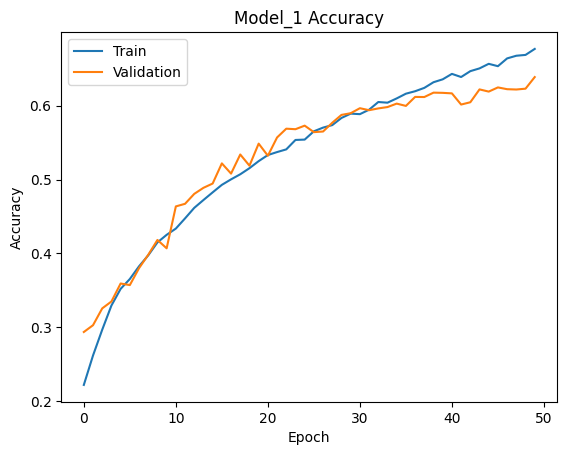

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

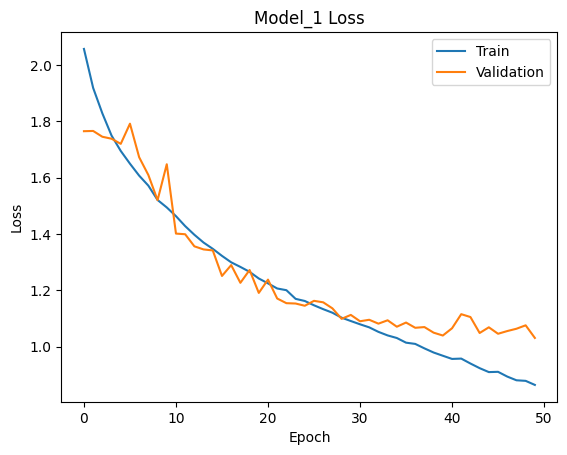

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Save the model & CM

56/56 [==============================] - 54s 977ms/step
[[ 416   21   72   90  156  173   32]
 [  13   69    5    6    6    8    4]
 [  78    4  384   69  113  254  116]
 [  22    1   25 1586   61   91   39]
 [  55    0   40  168  731  202   20]
 [  72    7   79   83  192  689   17]
 [   7    1   49   57   37   22  624]]


<Figure size 640x480 with 0 Axes>

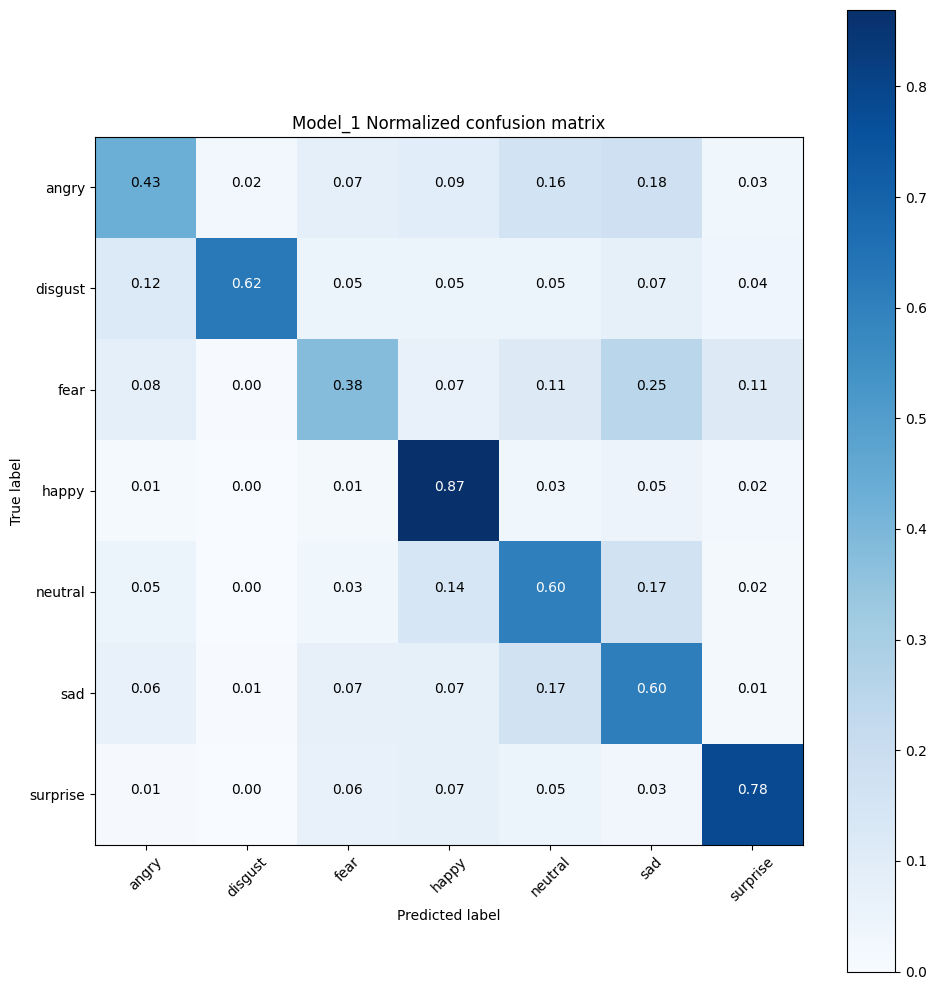

In [13]:
model.save('model_1.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Model_1 Normalized confusion matrix')
plt.show()

## Model 2
### change number of layers
### change dropout rate to 0.2
### Simplified structure

In [14]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Train model 2

In [15]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50


226/226 [==============================] - 8s 30ms/step - loss: 1.9389 - accuracy: 0.2745 - val_loss: 1.5941 - val_accuracy: 0.3970
Epoch 2/50
226/226 [==============================] - 7s 31ms/step - loss: 1.6717 - accuracy: 0.3655 - val_loss: 1.5370 - val_accuracy: 0.4123
Epoch 3/50
226/226 [==============================] - 7s 32ms/step - loss: 1.5829 - accuracy: 0.3946 - val_loss: 1.5024 - val_accuracy: 0.4332
Epoch 4/50
226/226 [==============================] - 7s 32ms/step - loss: 1.5181 - accuracy: 0.4173 - val_loss: 1.4618 - val_accuracy: 0.4472
Epoch 5/50
226/226 [==============================] - 8s 36ms/step - loss: 1.4687 - accuracy: 0.4417 - val_loss: 1.4303 - val_accuracy: 0.4568
Epoch 6/50
226/226 [==============================] - 8s 37ms/step - loss: 1.4311 - accuracy: 0.4544 - val_loss: 1.3836 - val_accuracy: 0.4761
Epoch 7/50
226/226 [==============================] - 8s 35ms/step - loss: 1.3891 - accuracy: 0.4659 - val_loss: 1.3949 - val_accuracy: 0.4750
Epoch 8/50

## Model_2 evaluation

In [16]:
print("Training Accuracy: ", max(history.history['accuracy']))
print("Validation Accuracy: ", max(history.history['val_accuracy']))
print("Training Loss: ", min(history.history['loss']))
print("Validation Loss: ", min(history.history['val_loss']))

Training Accuracy:  0.7266576290130615
Validation Accuracy:  0.6241154670715332
Training Loss:  0.758942723274231
Validation Loss:  1.0502386093139648


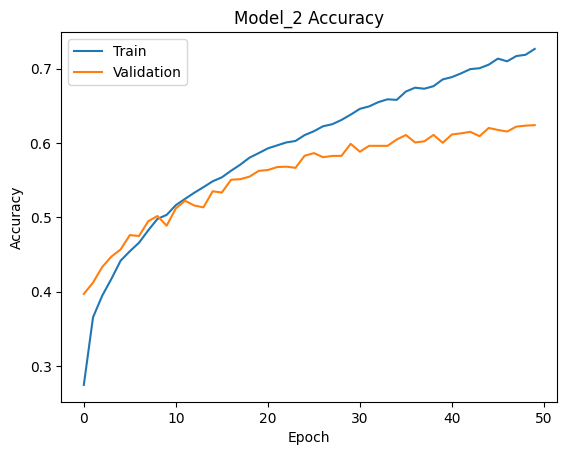

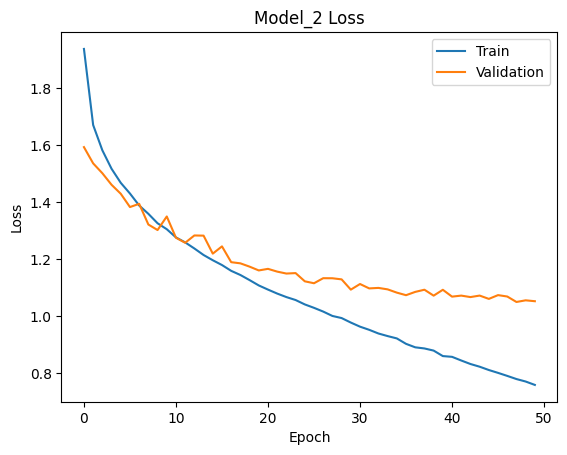

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 2s 25ms/step
[[ 468    5   80   80  112  188   27]
 [  15   62   10    3    4   14    3]
 [  96    5  404   63   94  247  109]
 [  51    1   37 1523   69  114   30]
 [  85    3   55  151  652  250   20]
 [  87    5   88   93  153  695   18]
 [  14    1   56   54   31   36  605]]


<Figure size 640x480 with 0 Axes>

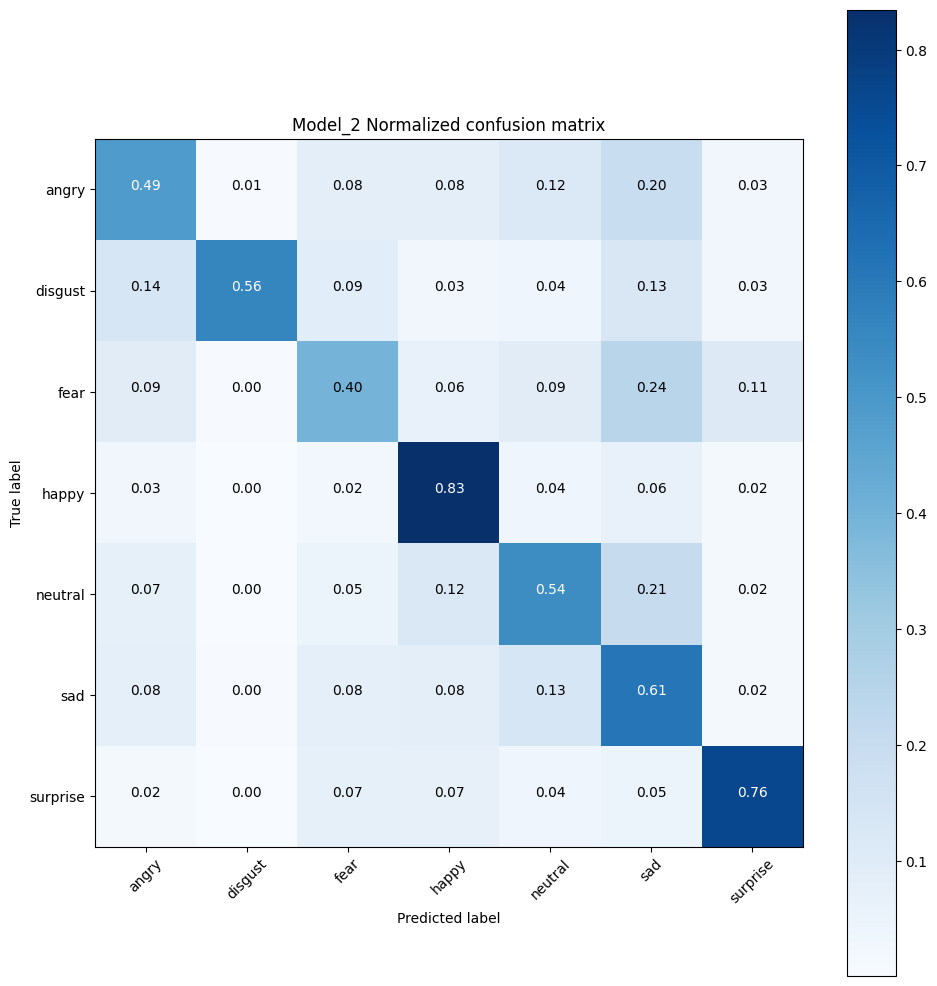

In [18]:
model.save('model_2.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Model_2 Normalized confusion matrix')
plt.show()

## Train Model 3
### Change optimizer and learning rate
### Add one more convolutional layer

In [19]:
from tensorflow.keras.optimizers import RMSprop

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 4th Convolution layer
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Convolution layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(nb_classes, activation='softmax'))

# Change the optimizer and learning rate
opt = RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
226/226 [==============================] - 11s 41ms/step - loss: 1.9055 - accuracy: 0.2743 - val_loss: 1.9404 - val_accuracy: 0.3101
Epoch 2/50
226/226 [==============================] - 9s 40ms/step - loss: 1.6081 - accuracy: 0.3807 - val_loss: 2.5878 - val_accuracy: 0.3189
Epoch 3/50
226/226 [==============================] - 9s 40ms/step - loss: 1.4387 - accuracy: 0.4493 - val_loss: 1.4049 - val_accuracy: 0.4432
Epoch 4/50
226/226 [==============================] - 9s 41ms/step - loss: 1.3386 - accuracy: 0.4862 - val_loss: 1.2945 - val_accuracy: 0.5167
Epoch 5/50
226/226 [==============================] - 9s 40ms/step - loss: 1.2726 - accuracy: 0.5151 - val_loss: 1.3083 - val_accuracy: 0.5010
Epoch 6/50
226/226 [==============================] - 9s 40ms/step - loss: 1.2215 - accuracy: 0.5347 - val_loss: 1.4247 - val_accuracy: 0.4391
Epoch 7/50
226/226 [==============================] - 9s 41ms/step - loss: 1.1767 - accuracy: 0.5501 - val_loss: 2.0763 - val_accuracy: 0.294

Training Accuracy:  0.8732521533966064
Validation Accuracy:  0.6381262540817261
Training Loss:  0.3509165942668915
Validation Loss:  1.0982074737548828


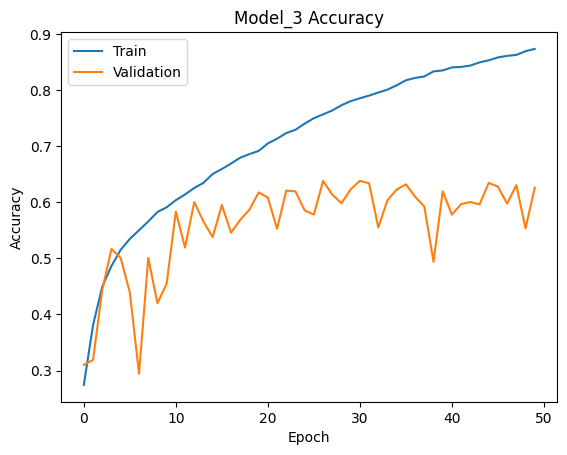

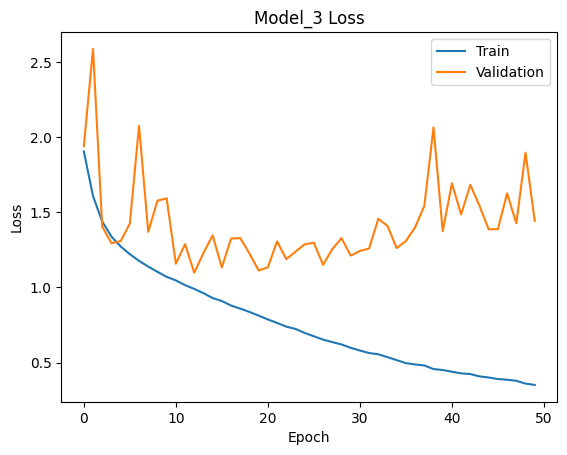

In [21]:
print("Training Accuracy: ", max(history.history['accuracy']))
print("Validation Accuracy: ", max(history.history['val_accuracy']))
print("Training Loss: ", min(history.history['loss']))
print("Validation Loss: ", min(history.history['val_loss']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 2s 26ms/step
[[ 561   26   54   50  120  126   23]
 [  20   73    6    2    4    4    2]
 [ 162   10  432   52   90  184   88]
 [  60    5   47 1470  122   88   33]
 [ 156    1   62  106  689  176   26]
 [ 170    7  110   59  191  585   17]
 [  27    2   61   44   26   19  618]]


<Figure size 640x480 with 0 Axes>

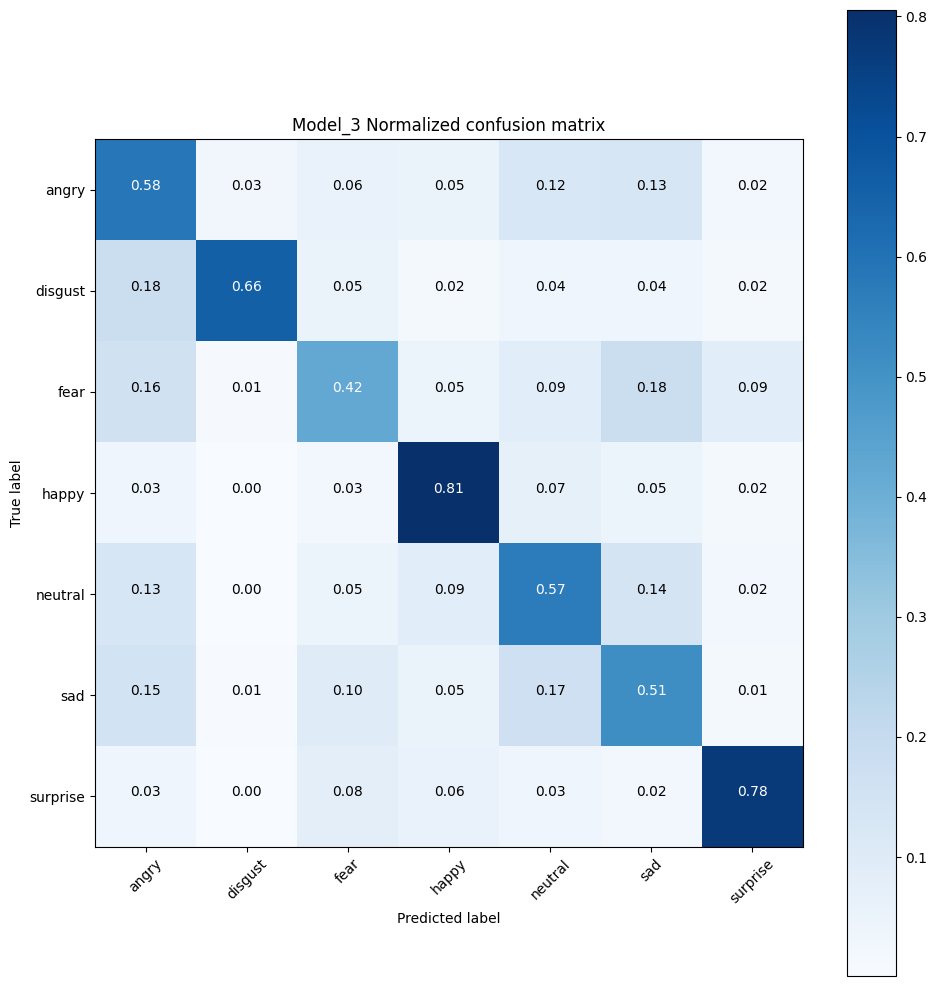

In [22]:
model.save('model_3.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Model_3 Normalized confusion matrix')
plt.show()

## Model 4
### change activation function using gelu, selu, leakyRelu and ELU

In [23]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48, 48, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128, (3,3), padding='same', activation=tfa.activations.gelu))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(256, (3,3), padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512, (3,3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(1024, activation=tfa.activations.gelu))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Fully connected layer 2nd layer
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(nb_classes, activation='softmax'))

# Change the optimizer and learning rate
opt = RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\wlf04\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\wlf04\anaconda3\envs\tf\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want

In [24]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
226/226 [==============================] - 16s 63ms/step - loss: 2.3802 - accuracy: 0.2640 - val_loss: 2.7597 - val_accuracy: 0.2540
Epoch 2/50
226/226 [==============================] - 14s 61ms/step - loss: 1.7831 - accuracy: 0.3890 - val_loss: 1.6560 - val_accuracy: 0.4028
Epoch 3/50
226/226 [==============================] - 14s 61ms/step - loss: 1.5598 - accuracy: 0.4537 - val_loss: 3.0574 - val_accuracy: 0.2448
Epoch 4/50
226/226 [==============================] - 14s 61ms/step - loss: 1.4210 - accuracy: 0.4952 - val_loss: 1.5642 - val_accuracy: 0.4339
Epoch 5/50
226/226 [==============================] - 13s 59ms/step - loss: 1.3368 - accuracy: 0.5276 - val_loss: 1.4428 - val_accuracy: 0.4733
Epoch 6/50
226/226 [==============================] - 13s 59ms/step - loss: 1.2581 - accuracy: 0.5518 - val_loss: 1.2453 - val_accuracy: 0.5586
Epoch 7/50
226/226 [==============================] - 14s 60ms/step - loss: 1.1899 - accuracy: 0.5770 - val_loss: 1.5306 - val_accuracy:

Training Accuracy:  0.9161375164985657
Validation Accuracy:  0.6453438997268677
Training Loss:  0.23803649842739105
Validation Loss:  1.1862441301345825


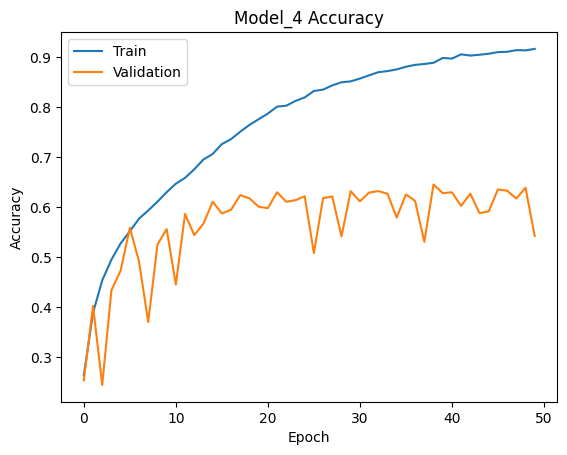

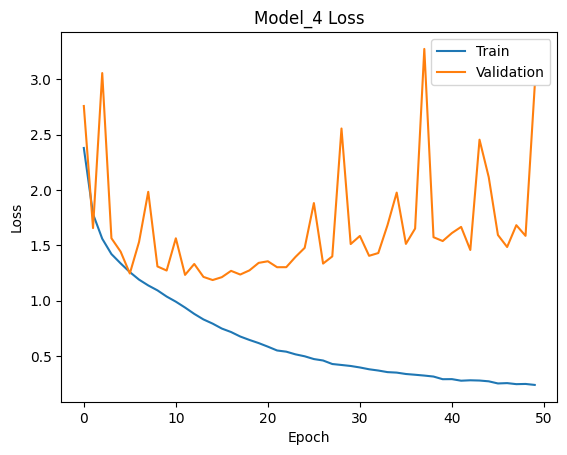

In [25]:
print("Training Accuracy: ", max(history.history['accuracy']))
print("Validation Accuracy: ", max(history.history['val_accuracy']))
print("Training Loss: ", min(history.history['loss']))
print("Validation Loss: ", min(history.history['val_loss']))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 2s 27ms/step
[[ 368   32  174    9  138  219   20]
 [  15   54   13    2    2   20    5]
 [  90   25  480   10  112  244   57]
 [  71   37  125 1073  227  215   77]
 [  60   40  146   35  637  274   24]
 [  46   27  185   13  184  664   20]
 [  20   11  111   17   35   34  569]]


<Figure size 640x480 with 0 Axes>

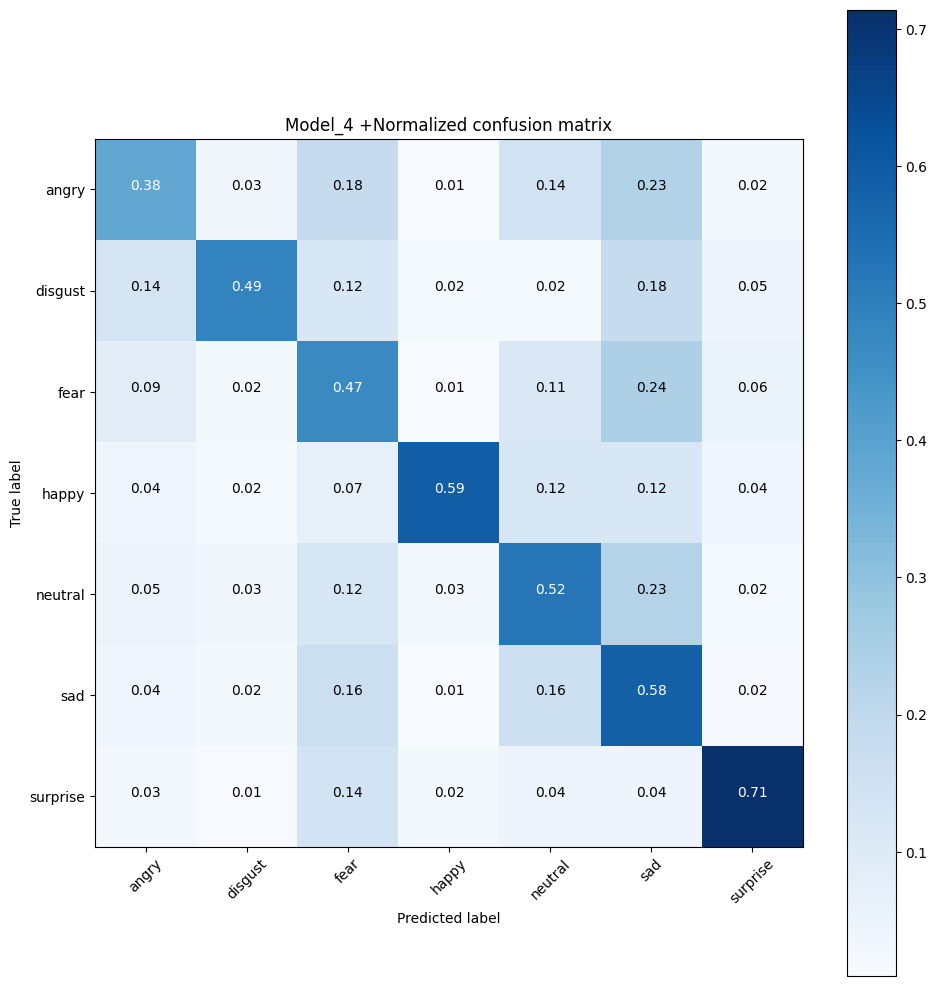

In [26]:
model.save('model_4.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Model_4 +Normalized confusion matrix')
plt.show()